# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [2]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


R-square: 0.6287
Mean square error: 0.0790
Mean absolute error: 0.2327
accuracy of model is:
0.6286551116796766


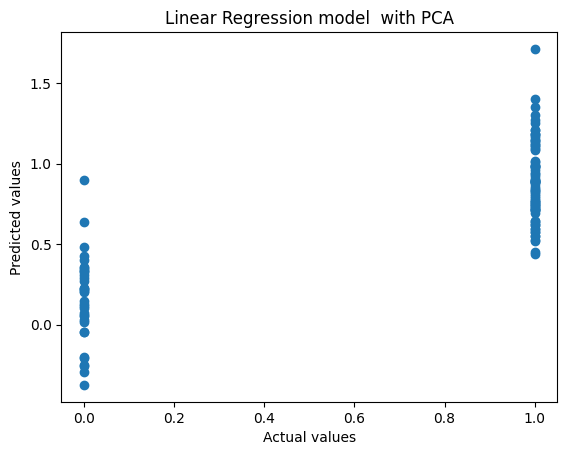

In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lr_transform = LinearRegression()
lr_transform.fit(X_train_pca, y_train)
y_pred = lr_transform.predict(X_test_pca)
r2= r2_score(y_test, y_pred)
mean_e = mean_squared_error(y_test, y_pred)
mean_abs_e = mean_absolute_error(y_test, y_pred)
accuracy = lr_transform.score(X_test_pca, y_test)
print(f"R-square: {r2:.4f}")
print(f"Mean square error: {mean_e:.4f}")
print(f"Mean absolute error: {mean_abs_e:.4f}")
print("accuracy of model is:")
print(accuracy)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression model  with PCA")
plt.show()



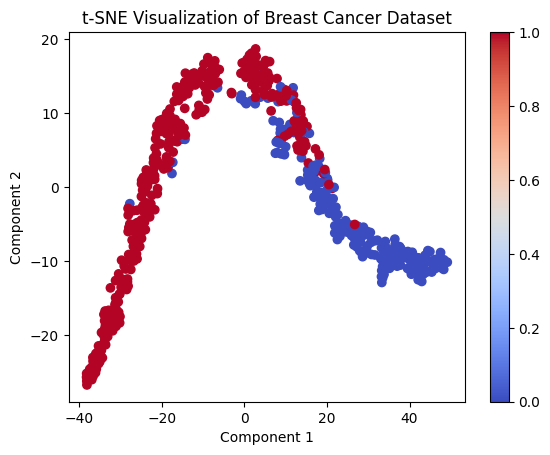

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# instantiate a t-SNE object with 2 components and fit it to the data
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# visualize the transformed data using a scatter plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm')
plt.colorbar()
plt.title('t-SNE Visualization of Breast Cancer Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


